This Python code is for Murata Electronics thermistor NXFT15WF104, available on digikey.com:  
https://www.digikey.com/product-detail/en/murata-electronics/NXFT15WF104FA2B100/490-5633-ND/2533824

In [1]:
# This code uses the NumPy, SciPy, Matplotlib libraries for fitting, plotting, etc.

import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as pp
pp.style.use( "seaborn-darkgrid" )

In [2]:
# NumPy array of temperatures from -40 degC to 125 degC
# unit: deg_C
Tref_arr = np.arange( -40, 130, 5 ) 

# list of resistance as a function of temperature
# reference: https://www.murata.com/~/media/webrenewal/support/library/catalog/products/thermistor/ntc/r44e.ashx?la=en-us
# page 31, top table, far-right column
# unit: kilo_ohm
Rref_list = [4397.119,3088.599,2197.225,1581.881,1151.037,846.579,628.988,471.632,357.012,272.500,
             209.710,162.651,127.080,100.000,79.222,63.167,50.677,40.904,33.195,27.091,22.224,
             18.323,15.184,12.635,10.566,8.873,7.481,6.337,5.384,4.594,3.934,3.380,2.916,2.522]
# NumPy array of resistance as a function of temperature
Rref_arr = np.array( Rref_list )

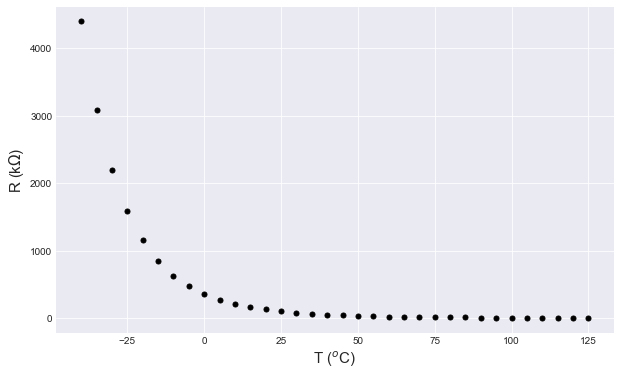

In [3]:
# First, plot the temperature response of the thermistor

pp.figure( figsize=(10,6) )
pp.plot( Tref_arr, Rref_arr, 'ko', ms=5 )
pp.ylabel(r"R (k$\Omega$)", size=15)
pp.xlabel(r"T ($^o$C)", size=15)
pp.show()

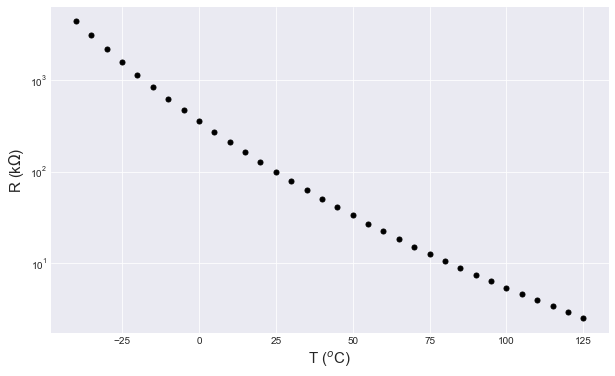

In [4]:
# Next, since the temperature response is highly non-linear (as expected), plot it in semilog scale

pp.figure( figsize=(10,6) )
pp.semilogy( Tref_arr, Rref_arr, 'ko', ms=5 )
pp.ylabel(r"R (k$\Omega$)", size=15)
pp.xlabel(r"T ($^o$C)", size=15)
pp.show()

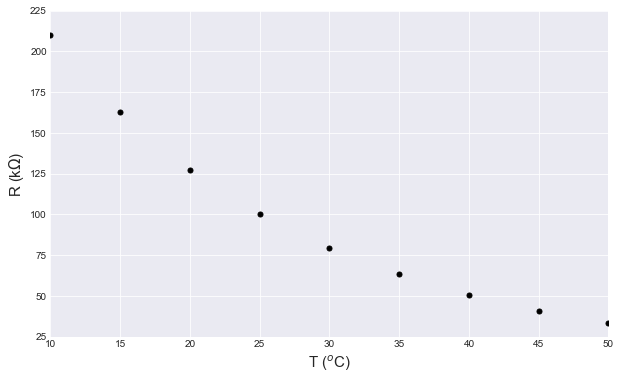

In [5]:
# Zoom in onto the relavent temperature range 

pp.figure( figsize=(10,6) )
pp.plot( Tref_arr, Rref_arr, 'ko', ms=5 )
pp.xlim( 10, 50 )
pp.ylim( 25, 225 )
pp.ylabel(r"R (k$\Omega$)", size=15)
pp.xlabel(r"T ($^o$C)", size=15)
pp.show()

In [6]:
# Function for fitting the Steinhart-Hart equation (or the beta-constant equation)

def fit_SteinhartHart( T_arr, R_arr, To=298.15, p0=[4250.0, 100.0] ):
    
    def func(x, beta, Ro):
        return Ro*np.exp( beta*( 1.0/(x+273.15) - 1.0/To ) )
    
    popt, pcov = curve_fit( f=func, xdata=T_arr, ydata=R_arr, p0=p0 )
    
    return popt

In [7]:
# Specify the lower and upper bounds of the temperature range within which to fit
T_low, T_high = 20, 40

a = np.searchsorted(Tref_arr, T_low)
b = np.searchsorted(Tref_arr, T_high)+1

# Fit curve and print results
beta, Ro = fit_SteinhartHart( Tref_arr[a:b], Rref_arr[a:b] )
print beta, Ro

4213.028596391909 99.91852971128439


In [8]:
# NumPy arrays used for plotting the fitting results
Tfit_arr = np.arange( 0, 65, 1 ) 
Rfit_arr = Ro*np.exp( beta*( 1.0/(Tfit_arr+273.15) - 1.0/298.15 ) )

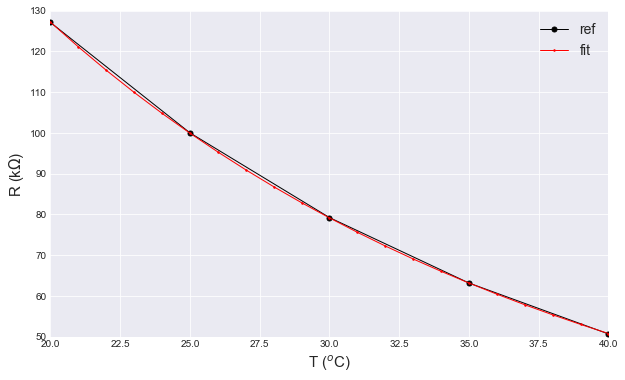

In [9]:
# Plot fitting result with reference data points
    
pp.figure( figsize=(10,6) )
pp.plot( Tref_arr, Rref_arr, 'ko-', ms=5, lw=1, label="ref" )
pp.plot( Tfit_arr, Rfit_arr, 'r.-', ms=3, lw=1, label="fit" )
pp.xlim( 20, 40 )
pp.ylim( 50, 130 )
pp.ylabel(r"R (k$\Omega$)", size=15)
pp.xlabel(r"T ($^o$C)", size=15)
pp.legend( loc='best', prop={'size':14} )
pp.show()